# Tackling Classification Problems

#### Things to look out:
- class imbalance: use classification report, ROC, AUC for this matter    (DataCamp: Supervised Learning)
- hyperparameter tuning: GridSearchCv, RandomizedSearchCV, hold-out set   (DataCamp: Supervised Learning)
- 


## Confusion Matrix: Spam Example
$$Precision = \frac{tp}{tp + fp}\\Recall = \frac{tp}{tp + fn}\\F1 score = 2 * \frac{precision*recall}{precision + recall}$$
<b>High Precision</b> = not many real emails predicted as spam <br>
<b>High Recall</b> = predicted most spam emails correctly

<img src='images/confusion_matrix.png' alt='Confusion Matrix' width=700 height=400>

In [1]:
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn.datasets import load_iris

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


In [2]:
iris = load_iris()
iris_df = pd.DataFrame(iris.data, columns=iris.feature_names)
iris_df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [3]:
X, y = iris_df, iris.target
print(X.shape, y.shape)

(150, 4) (150,)


In [4]:
# simple LogisticRegression to illustrate confusion matrix
log_reg = LogisticRegression().fit(X, y)
confusion_matrix(y, log_reg.predict(X))

array([[50,  0,  0],
       [ 0, 47,  3],
       [ 0,  1, 49]])

In [5]:
print(classification_report(y, log_reg.predict(X)))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        50
           1       0.98      0.94      0.96        50
           2       0.94      0.98      0.96        50

    accuracy                           0.97       150
   macro avg       0.97      0.97      0.97       150
weighted avg       0.97      0.97      0.97       150



## LogisticRegression & ROC Curve
Use this when there's a <b>binary</b> classification!


In [6]:
diabetes = pd.read_csv('datasets/diabetes.csv')
diabetes.head(3)

,pregnancies,glucose,diastolic,triceps,insulin,bmi,dpf,age,diabetes
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1


In [7]:
from sklearn.model_selection import train_test_split

X, y = diabetes.drop('diabetes', axis=1), diabetes['diabetes']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.2)
log_reg = LogisticRegression().fit(X_train, y_train)
y_pred = log_reg.predict(X_test)


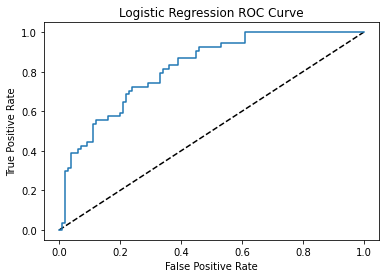

In [8]:
from sklearn.metrics import roc_curve
y_pred_prob = log_reg.predict_proba(X_test)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)

_ = plt.plot([0, 1], [0, 1], 'k--')
_ = plt.plot(fpr, tpr, label='Logistic Regression')
_ = plt.xlabel('False Positive Rate')
_ = plt.ylabel('True Positive Rate')
_ = plt.title('Logistic Regression ROC Curve')
plt.show()

## AUC 

In [10]:
from sklearn.metrics import roc_auc_score
from sklearn.model_selection import cross_val_score

print('AUC score:', roc_auc_score(y_test, y_pred_prob))
cv_scores = cross_val_score(log_reg, X, y, cv=5, scoring='roc_auc')
cv_scores

AUC score: 0.8192592592592592


array([0.80814815, 0.80777778, 0.82666667, 0.87528302, 0.83433962])

## Hyperparameter Tuning
#### GridSearchCV w/ cross_val_score

In [11]:
from sklearn.model_selection import GridSearchCV 
from sklearn.neighbors import KNeighborsClassifier
param_grid = {
    'n_neighbors': np.arange(1, 50)
}

knn = KNeighborsClassifier()
knn_cv = GridSearchCV(knn, param_grid, cv=5)
knn_cv.fit(X, y)

print(knn_cv.best_params_)
print(knn_cv.best_score_)


{'n_neighbors': 14}
0.7578558696205755


In [13]:
# knn_cv.cv_results_

In [16]:
# logistic regression example
c_space = np.logspace(-5, 8, 15)
param_grid = {'C': c_space}

logreg = LogisticRegression()
logreg_cv = GridSearchCV(logreg, param_grid, cv=5).fit(X, y)

print(logreg_cv.best_params_)
print(logreg_cv.best_score_)

{'C': 0.05179474679231213}
0.774755962991257


In [17]:
c_space

array([1.00000000e-05, 8.48342898e-05, 7.19685673e-04, 6.10540230e-03,
       5.17947468e-02, 4.39397056e-01, 3.72759372e+00, 3.16227766e+01,
       2.68269580e+02, 2.27584593e+03, 1.93069773e+04, 1.63789371e+05,
       1.38949549e+06, 1.17876863e+07, 1.00000000e+08])

## RandomizedSearchCV
GridSearchCV can be computationally expensive, especially if you are searching over a large hyperparameter space and dealing with multiple hyperparameters. A solution to this is to use RandomizedSearchCV, in which not all hyperparameter values are tried out. Instead, a fixed number of hyperparameter settings is sampled from specified probability distributions. You'll practice using RandomizedSearchCV in this exercise and see how this works.

In [21]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint

# Setup the parameters and distributions to sample from: param_dist
param_dist = {
    'max_depth': [3, None],
    'max_features': randint(1, 9),
    'min_samples_leaf': randint(1, 9),
    'criterion': ['gini', 'entropy']
}

# Instantiate a Decision Tree classifier: tree
tree = DecisionTreeClassifier()
tree_cv = RandomizedSearchCV(tree, param_dist, cv=5).fit(X, y)

# Print the tuned parameters and score
print("Tuned Decision Tree Parameters: {}".format(tree_cv.best_params_))
print("Best score is {}".format(tree_cv.best_score_))

Tuned Decision Tree Parameters: {'criterion': 'entropy', 'max_depth': 3, 'max_features': 7, 'min_samples_leaf': 2}
Best score is 0.7396316102198455


## Hold-out set 

In [22]:
# Import necessary modules
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV

# Create the hyperparameter grid
c_space = np.logspace(-5, 8, 15)
param_grid = {'C': c_space, 'penalty': ['l1', 'l2']}

# Instantiate the logistic regression classifier: logreg
logreg = LogisticRegression()

# Create train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.4, random_state=42)

# Instantiate the GridSearchCV object: logreg_cv
logreg_cv = GridSearchCV(logreg, param_grid, cv=5)

# Fit it to the training data
logreg_cv.fit(X_train, y_train)

# Print the optimal parameters and best score
print("Tuned Logistic Regression Parameter: {}".format(logreg_cv.best_params_))
print("Tuned Logistic Regression Accuracy: {}".format(logreg_cv.best_score_))


Tuned Logistic Regression Parameter: {'C': 163789.3706954068, 'penalty': 'l2'}
Tuned Logistic Regression Accuracy: 0.7782608695652173
